***

## Random Forest Classification 

***

### 👉🏾 Data Preprocessing

#### ☑️Importing libraries and dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/HP Elitebook/OneDrive/Bureau/HOMEWORKS/PYTHON/ML_BOOTCAMP/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 16 - Support Vector Machine (SVM)/Python/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


#### ☑️ Features Engineering

In [3]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split as tts_
X_train, X_test, y_train, y_test = tts_(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 👉🏾 Training SVM on the Training Set

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### 👉🏾 Predictions and Model Evaluation

#### ☑️ Prediction

In [7]:
y_pred = classifier.predict(X_test)

#### ☑️ Model Evaluation

##### Accuracy Score and Confusion Matrix

In [8]:
from sklearn.metrics import accuracy_score as score, confusion_matrix as matrix
score_ = score(y_test, y_pred)
conf = matrix(y_test, y_pred)
score_, conf

(0.91,
 array([[63,  5],
        [ 4, 28]], dtype=int64))

##### Classification Report

In [9]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



##### Comparison Table

In [10]:
dic = {'prediction': y_pred, 'Test': y_test}
tab = pd.DataFrame(dic)
tab

,prediction,Test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,1
98,1,1


### 👉🏾Visualization 

#### ☑️ Training Set

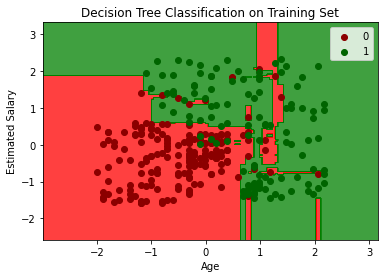

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, 
                               step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))
plt.contourf(X1, X2,
           classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
           alpha = 0.75,
           cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set == j, 1],
                color = ListedColormap(('darkred', 'darkgreen'))(i), label = j)
plt.title('Decision Tree Classification on Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### ☑️ Test Set

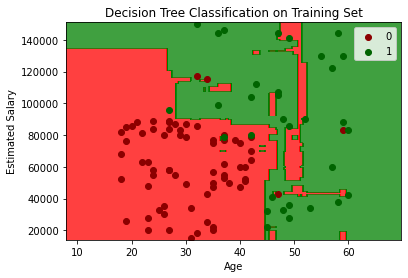

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                               stop = X_set[:, 0].max() + 10, 
                               step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000,
                               stop = X_set[:, 1].max() + 1000, 
                               step = 0.25))
plt.contourf(X1, X2,
           classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75,
           cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set == j, 1],
                color = ListedColormap(('darkred', 'darkgreen'))(i), label = j)
plt.title('Decision Tree Classification on Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()